## Setting

In [ ]:
!pip install mmcv-full
!git clone https://github.com/open-mmlab/mmsegmentation.git 
%cd mmsegmentation
!pip install -e .

     |████████████████████████████████| 390 kB 5.1 MB/s 
     |████████████████████████████████| 185 kB 72.7 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.17-cp37-cp37m-linux_x86_64.whl size=44504930 sha256=78a3ebc52eb7b0affcb383a6220833d2a902b78670de07fb3dd2ab0e42403626
  Stored in directory: /root/.cache/pip/wheels/5f/63/2c/49cc449e4a860b364c49c0b77d2275cb012f625d7c9203e444
Successfully built mmcv-full
Cloning into 'mmsegmentation'...
remote: Enumerating objects: 4835, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 4835 (delta 54), reused 79 (delta 46), pack-reused 4716
Receiving objects: 100% (4835/4835), 6.35 MiB | 15.82 MiB/s, done.
Resolving deltas: 100% (3453/3453), done.
/content/mmsegmentation
Obtaining file:///content/mmsegmentation
  Running setup.py develop for mmsegmentation


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install wandb
!wandb login

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
     |████████████████████████████████| 140 kB 61.9 MB/s 
     |████████████████████████████████| 97 kB 9.4 MB/s 
     |████████████████████████████████| 180 kB 75.0 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=4d2a134e953e20b4156cd8af6700623e8110a823cfbbfe45f5c494c626c074b1
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=a8855748fa6974d5af90eafb7b4cefe7a46af330251c6bc6af695b6582f2013f
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or p

In [ ]:
import os

# Google drive directory name
DATE = "11-23"
MODEL_NAME = "DeepLabv3+"
FRAMEWORK = "mmSeg"
DATA_TYPE = "Dent"
TITLE = "_".join([DATE, DATA_TYPE, MODEL_NAME, FRAMEWORK])

# Wandb Name
WANDB_PROJECT = "[Dent]mmSeg"
WANDB_NAME = "ocrnet_hr48_512x1024_40k_cityscapes"

BASE_WORK_DIR = "/content/drive/Shareddrives/VIAI_team/tw/model_test"
WORKING_DIR = os.path.join(BASE_WORK_DIR, TITLE)

if not os.path.exists(WORKING_DIR):
    os.makedirs(WORKING_DIR)

# weight와 log 파일 저장소
print(f"WORKING DIRECTORY: {WORKING_DIR}")

WORKING DIRECTORY: /content/drive/Shareddrives/VIAI_team/tw/model_test/11-23_Dent_DeepLabv3+_mmSeg


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Not connected to a GPU')
else:
    print(gpu_info)

Tue Nov 23 07:52:20 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    47W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install albumentations>=0.3.2 --no-binary imgaug,albumentations

In [ ]:
import mmcv
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os.path as osp
import numpy as np
from PIL import Image

from mmseg.datasets.builder import DATASETS
from mmseg.datasets.custom import CustomDataset
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette
from mmcv import Config

from mmseg.datasets import build_dataset
from mmseg.models import build_segmentor
from mmseg.apis import train_segmentor

## Pretrained model 다운로드


In [ ]:
!cd mmsegmentation; mkdir checkpoints

/bin/bash: line 0: cd: mmsegmentation: No such file or directory


In [ ]:
PRETRAINED_MODEL="https://download.openmmlab.com/mmsegmentation/v0.5/deeplabv3plus/deeplabv3plus_r101b-d8_769x769_80k_cityscapes/deeplabv3plus_r101b-d8_769x769_80k_cityscapes_20201226_205041-227cdf7c.pth"
SAVE_PATH="/content/mmsegmentation/checkpoints/deeplabv3plus_r101b-d8_769x769_80k_cityscapes_20201226_205041-227cdf7c.pth"

In [ ]:
!wget -O {SAVE_PATH} {PRETRAINED_MODEL}

--2021-11-23 07:52:32--  https://download.openmmlab.com/mmsegmentation/v0.5/deeplabv3plus/deeplabv3plus_r101b-d8_769x769_80k_cityscapes/deeplabv3plus_r101b-d8_769x769_80k_cityscapes_20201226_205041-227cdf7c.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.15
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 250891199 (239M) [application/octet-stream]
Saving to: ‘/content/mmsegmentation/checkpoints/deeplabv3plus_r101b-d8_769x769_80k_cityscapes_20201226_205041-227cdf7c.pth’

/content/mmsegmenta 100%[===================>] 239.27M  5.58MB/s    in 37s     

2021-11-23 07:53:10 (6.43 MB/s) - ‘/content/mmsegmentation/checkpoints/deeplabv3plus_r101b-d8_769x769_80k_cityscapes_20201226_205041-227cdf7c.pth’ saved [250891199/250891199]



In [ ]:
# 기본 config, pretrained 모델의 checkpoint
config_file = '/content/mmsegmentation/configs/deeplabv3plus/deeplabv3plus_r101b-d8_769x769_80k_cityscapes.py'
checkpoint_file = SAVE_PATH

In [ ]:
# 파일 목록 텍스트 파일 만들기
DATA_TYPE = "dent"
train_file_list = []
valid_file_list = []
test_file_list = []

DATA_DIR = f"/content/drive/Shareddrives/VIAI_team/data/PNG_MASK_DATA/PNG_MASKS+EXTRA_DATA/{DATA_TYPE}"

train_image_path = os.path.join(DATA_DIR, "train", "images")
valid_image_path = os.path.join(DATA_DIR, "valid", "images")
test_image_path = os.path.join(DATA_DIR, "test", "images")

train_file_list = [os.path.splitext(file)[0] for file in os.listdir(train_image_path)]
valid_file_list = [os.path.splitext(file)[0] for file in os.listdir(valid_image_path)]
test_file_list = [os.path.splitext(file)[0] for file in os.listdir(test_image_path)]

with open(os.path.join(DATA_DIR, "train", f"{DATA_TYPE}_train.txt"), "w") as f:
    f.writelines(line + "\n" for line in train_file_list)
with open(os.path.join(DATA_DIR, "valid", f"{DATA_TYPE}_valid.txt"), "w") as f:
    f.writelines(line + "\n" for line in valid_file_list)
with open(os.path.join(DATA_DIR, "test", f"{DATA_TYPE}_test.txt"), "w") as f:
    f.writelines(line + "\n" for line in test_file_list)

In [ ]:
# CLASSES, PALETTE 지정
classes = ["bg", "dent"]
palette = [
    [0, 0, 0],
    [255, 0, 0],
]

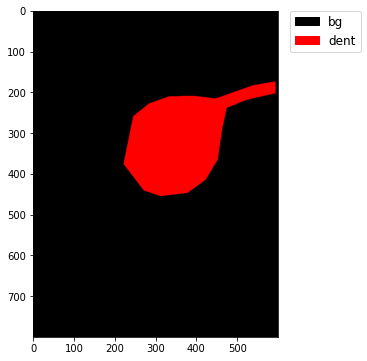

In [ ]:
mask_name = "20190218_12985_20129968_2e0da3c3e2ace9c780abb1eeb060d43f.png"
mask_dir = "/content/drive/Shareddrives/VIAI_team/data/accida_masked_only_dataset_v1/dent/train/train_ann"
img = Image.open(os.path.join(mask_dir, mask_name))
plt.figure(figsize=(8, 6))
im = plt.imshow(np.array(img.convert('RGB')))

# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=np.array(palette[i])/255., label=classes[i]) for i in range(2)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
           fontsize='large')

plt.show()

In [ ]:
@DATASETS.register_module(force=True)
class DentDataset(CustomDataset):
    CLASSES = classes
    PALETTE = palette
    
    def __init__(self, split, **kwargs):
        super().__init__(img_suffix='.jpg', seg_map_suffix='.png', split=split, **kwargs)
        assert osp.exists(self.img_dir) and self.split is not None

In [ ]:
cfg = Config.fromfile(config_file)

print(cfg.pretty_text)

norm_cfg = dict(type='SyncBN', requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained='torchvision://resnet101',
    backbone=dict(
        type='ResNet',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='SyncBN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True),
    decode_head=dict(
        type='DepthwiseSeparableASPPHead',
        in_channels=2048,
        in_index=3,
        channels=512,
        dilations=(1, 12, 24, 36),
        c1_in_channels=256,
        c1_channels=48,
        dropout_ratio=0.1,
        num_classes=19,
        norm_cfg=dict(type='SyncBN', requires_grad=True),
        align_corners=True,
        loss_decode=dict(
            type='CrossEntropyLoss', use_sigmoid=False, loss_weight=1.0)),
    auxiliary_head=dict(
        type='FCNHead',
        in_channels=1024,
        in_in

In [ ]:
from mmseg.apis import set_random_seed

# add CLASSES and PALETTE to checkpoint
cfg.checkpoint_config.meta = dict(
    CLASSES=classes,
    PALETTE=palette)

# Since we use ony one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg


# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 2
cfg.model.auxiliary_head.num_classes = 2

cfg.data.samples_per_gpu = 2
cfg.data.workers_per_gpu = 2

In [ ]:
# cfg.img_norm_cfg = dict(
#     mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=False)
    
# cfg.crop_size = (256, 256)
# cfg.train_pipeline = [
#     dict(type='LoadImageFromFile'),
#     dict(type='LoadAnnotations'),
#     dict(type='Resize', img_scale=(320, 240), ratio_range=(0.5, 2.0)),
#     dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
#     dict(type='RandomFlip', flip_ratio=0.5),
#     dict(type='PhotoMetricDistortion'),
#     dict(type='Normalize', **cfg.img_norm_cfg),
#     dict(type='Pad', size=cfg.crop_size, pad_val=0, seg_pad_val=255),
#     dict(type='DefaultFormatBundle'),
#     dict(type='Collect', keys=['img', 'gt_semantic_seg']),
# ]

# cfg.test_pipeline = [
#     dict(type='LoadImageFromFile'),
#     dict(
#         type='MultiScaleFlipAug',
#         img_scale=(320, 240),
#         # img_ratios=[0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
#         flip=False,
#         transforms=[
#             dict(type='Resize', keep_ratio=True),
#             dict(type='RandomFlip'),
#             dict(type='Normalize', **cfg.img_norm_cfg),
#             dict(type='ImageToTensor', keys=['img']),
#             dict(type='Collect', keys=['img']),
#         ])
# ]

In [ ]:
# Modify dataset type and path
cfg.dataset_type = 'DentDataset'
cfg.data_root = DATA_DIR

cfg.data.train.type = 'DentDataset'
cfg.data.train.data_root = cfg.data_root
cfg.data.train.img_dir = "train/images"
cfg.data.train.ann_dir = "train/masks"
# cfg.data.train.pipeline = cfg.train_pipeline
cfg.data.train.split = 'train/dent_train.txt'

cfg.data.val.type = 'DentDataset'
cfg.data.val.data_root = cfg.data_root
cfg.data.val.img_dir = "valid/images"
cfg.data.val.ann_dir = "valid/masks"
# cfg.data.val.pipeline = cfg.test_pipeline
cfg.data.val.split = 'valid/dent_valid.txt'

cfg.data.test.type = 'DentDataset'
cfg.data.test.data_root = cfg.data_root
cfg.data.test.img_dir = "test/images"
cfg.data.test.ann_dir = "test/masks"
# cfg.data.test.pipeline = cfg.test_pipeline
cfg.data.test.split = 'test/dent_test.txt'

In [ ]:
cfg.load_from = checkpoint_file
cfg.work_dir = WORKING_DIR

In [ ]:
cfg.optimizer.lr = 0.01 / 8

# cfg.lr_config.warmup = None
# cfg.lr_config.policy = 'step'
# cfg.lr_config.by_epoch = True

cfg.lr_config = dict(
    policy='step',
    warmup=None,
    warmup_iters=500,
    warmup_ratio=0.1,
    step=[20, 40, 60, 70, 80, 85, 90, 94, 96],
    by_epoch=True)


cfg.log_config = dict(
    interval = 5,
    hooks=[
           dict(type='TextLoggerHook', by_epoch=True),
           dict(type='TensorboardLoggerHook'),
           dict(type='WandbLoggerHook', by_epoch=True,
           init_kwargs=dict(
               project=WANDB_PROJECT, entity="viai", name=WANDB_NAME
              ),
          )
    ]
)

cfg.runner = dict(type='EpochBasedRunner', max_epochs=100)

cfg.checkpoint_config.by_epoch=True
cfg.checkpoint_config.interval = 20

cfg.evaluation.interval = 5 #  by_epoch 

In [ ]:
# Set seed to facitate reproducing the result
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# Let's have a look at the final config used for training
print(cfg.pretty_text)

norm_cfg = dict(type='BN', requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained='torchvision://resnet101',
    backbone=dict(
        type='ResNet',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True),
    decode_head=dict(
        type='DepthwiseSeparableASPPHead',
        in_channels=2048,
        in_index=3,
        channels=512,
        dilations=(1, 12, 24, 36),
        c1_in_channels=256,
        c1_channels=48,
        dropout_ratio=0.1,
        num_classes=2,
        norm_cfg=dict(type='BN', requires_grad=True),
        align_corners=True,
        loss_decode=dict(
            type='CrossEntropyLoss', use_sigmoid=False, loss_weight=1.0)),
    auxiliary_head=dict(
        type='FCNHead',
        in_channels=1024,
        in_index=2,
      

## Train

In [ ]:
# Build the dataset
datasets = [build_dataset(cfg.data.train)]

## 추가 부분
datasets[0].CLASSES = classes
datasets[0].PALETTE = palette

2021-11-23 07:53:40,084 - mmseg - INFO - Loaded 2282 images


In [ ]:
# Build the detector
model = build_segmentor(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))

## 추가 부분
model.CLASSES = datasets[0].CLASSES
model.PALETTE = datasets[0].PALETTE

/content/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '


In [ ]:
# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))

In [ ]:
train_segmentor(model, datasets, cfg, distributed=False, validate=True, 
                meta=dict())

2021-11-23 07:53:50,938 - mmseg - INFO - Loaded 267 images
2021-11-23 07:53:50,940 - mmseg - INFO - load checkpoint from local path: /content/mmsegmentation/checkpoints/deeplabv3plus_r101b-d8_769x769_80k_cityscapes_20201226_205041-227cdf7c.pth
2021-11-23 07:53:51,211 - mmseg - WARNING - The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([19, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([2, 512, 1, 1]).
size mismatch for decode_head.conv_seg.bias: copying a param with shape torch.Size([19]) from checkpoint, the shape in current model is torch.Size([2]).
size mismatch for auxiliary_head.conv_seg.weight: copying a param with shape torch.Size([19, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([2, 256, 1, 1]).
size mismatch for auxiliary_head.conv_seg.bias: copying a param with shape torch.Size([19]) from checkpoint, the shape in current model is torch.Siz

RuntimeError: ignored

## Inference

In [ ]:
checkpoint_file = os.path.join(WORKING_DIR, "latest.pth")
model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')

In [ ]:
TEST_IMAGE_DIR = ""

test_images = []
for r, ds, fs in os.walk(TEST_IMAGE_DIR):
    for f in fs:
        test_images.append(os.path.join(r, f))

In [ ]:
import cv2

def show_result(model_ckpt, image_list, n=5):
    for i, image in enumerate(image_list):
        img = cv2.imread(image)
        result = inference_detector(model_ckpt, img)
        show_result_pyplot(model_ckpt, img, result, score_thr=0.5)
        if i > n:
            break

In [ ]:
show_result(model_ckpt, test_images, n=10)